#Data Transformation
Steps for Data Transformation

Import Libraries
Load Data
Seprate Input and Output attributes
Perform scaling (Min-Max Normalization)
Perform Standardization

In [204]:
#importing 
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer 
# from word2number import w2n 


In [205]:
#connection to drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
#fetch file
data=pd.read_csv('/content/drive/MyDrive/COLAB/Exercise-CarData.csv')
print("\nData :\n",data)
print("\nData statistics :\n",data.describe())


Data :
       Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0              0  13500  23.0  46986  ...         0  2000  three    1165
1              1  13750  23.0  72937  ...         0  2000      3    1165
2              2  13950  24.0  41711  ...         0  2000      3    1165
3              3  14950  26.0  48000  ...         0  2000      3    1165
4              4  13750  30.0  38500  ...         0  2000      3    1170
...          ...    ...   ...    ...  ...       ...   ...    ...     ...
1431        1431   7500   NaN  20544  ...         0  1300      3    1025
1432        1432  10845  72.0     ??  ...         0  1300      3    1015
1433        1433   8500   NaN  17016  ...         0  1300      3    1015
1434        1434   7250  70.0     ??  ...         0  1300      3    1015
1435        1435   6950  76.0      1  ...         0  1600      5    1114

[1436 rows x 11 columns]

Data statistics :
         Unnamed: 0         Price  ...           CC      Weight
count 

In [207]:
# Step 3: Seprate Input and Output attributes

# All rows, all columns except last 
X = data.iloc[:, :-1].values 
  
# Only last column  
Y = data.iloc[:, -1].values 

print("\n\nInput : \n", X) 
print("\n\nOutput: \n", Y)




Input : 
 [[0 13500 23.0 ... 0 2000 'three']
 [1 13750 23.0 ... 0 2000 '3']
 [2 13950 24.0 ... 0 2000 '3']
 ...
 [1433 8500 nan ... 0 1300 '3']
 [1434 7250 70.0 ... 0 1300 '3']
 [1435 6950 76.0 ... 0 1600 '5']]


Output: 
 [1165 1165 1165 ... 1015 1015 1114]


In [208]:
# Step 4: Find the missing values and handle it in either way
# data.dropna(axis=0,how="all",inplace=True)
# print("New Dataset :\n",data)

#4b. Removing the row with any one null values

data.dropna(axis=0,how='any',inplace=True)
print("New Dataset :\n",data)


New Dataset :
       Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0              0  13500  23.0  46986  ...         0  2000  three    1165
1              1  13750  23.0  72937  ...         0  2000      3    1165
3              3  14950  26.0  48000  ...         0  2000      3    1165
4              4  13750  30.0  38500  ...         0  2000      3    1170
5              5  12950  32.0  61000  ...         0  2000      3    1170
...          ...    ...   ...    ...  ...       ...   ...    ...     ...
1425        1425   7950  80.0     ??  ...         0  1300      4    1000
1429        1429   8950  78.0  24000  ...         1  1300      5    1065
1430        1430   8450  80.0  23000  ...         0  1300      3    1015
1432        1432  10845  72.0     ??  ...         0  1300      3    1015
1435        1435   6950  76.0      1  ...         0  1600      5    1114

[1111 rows x 11 columns]


In [209]:
updated_data = data;
updated_data['Age']=updated_data['Age'].fillna(updated_data['Age'].mean())
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1111 non-null   int64  
 1   Price       1111 non-null   int64  
 2   Age         1111 non-null   float64
 3   KM          1111 non-null   object 
 4   FuelType    1111 non-null   object 
 5   HP          1111 non-null   object 
 6   MetColor    1111 non-null   float64
 7   Automatic   1111 non-null   int64  
 8   CC          1111 non-null   int64  
 9   Doors       1111 non-null   object 
 10  Weight      1111 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 104.2+ KB


Replace all question marks with NAN

In [210]:
updated_data = data;
updated_data['KM']=updated_data['KM'].replace(r'^[?]+$', float(np.nan), regex=True)
updated_data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1111 non-null   int64  
 1   Price       1111 non-null   int64  
 2   Age         1111 non-null   float64
 3   KM          1099 non-null   object 
 4   FuelType    1111 non-null   object 
 5   HP          1111 non-null   object 
 6   MetColor    1111 non-null   float64
 7   Automatic   1111 non-null   int64  
 8   CC          1111 non-null   int64  
 9   Doors       1111 non-null   object 
 10  Weight      1111 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 104.2+ KB


In [211]:
data

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
5,5,12950,32.0,61000,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1425,1425,7950,80.0,NaN,Petrol,86,1.0,0,1300,4,1000
1429,1429,8950,78.0,24000,Petrol,86,1.0,1,1300,5,1065
1430,1430,8450,80.0,23000,Petrol,86,0.0,0,1300,3,1015
1432,1432,10845,72.0,NaN,Petrol,86,0.0,0,1300,3,1015


In [212]:
updated_data = data;
updated_data['HP']=updated_data['HP'].replace(r'^[?]+$', float(np.nan), regex=True)
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1111 non-null   int64  
 1   Price       1111 non-null   int64  
 2   Age         1111 non-null   float64
 3   KM          1099 non-null   object 
 4   FuelType    1111 non-null   object 
 5   HP          1108 non-null   object 
 6   MetColor    1111 non-null   float64
 7   Automatic   1111 non-null   int64  
 8   CC          1111 non-null   int64  
 9   Doors       1111 non-null   object 
 10  Weight      1111 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 104.2+ KB


In [213]:
data

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
5,5,12950,32.0,61000,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1425,1425,7950,80.0,NaN,Petrol,86,1.0,0,1300,4,1000
1429,1429,8950,78.0,24000,Petrol,86,1.0,1,1300,5,1065
1430,1430,8450,80.0,23000,Petrol,86,0.0,0,1300,3,1015
1432,1432,10845,72.0,NaN,Petrol,86,0.0,0,1300,3,1015


Replace words into numbers

In [214]:
updated_data = data;
updated_data['Doors']=updated_data['Doors'].replace(r'^(three)$', 3, regex=True)
updated_data['Doors']=updated_data['Doors'].replace(r'^(four)$', 4, regex=True)
updated_data['Doors']=updated_data['Doors'].replace(r'^(five)$', 5, regex=True)
updated_data.info()
data =  updated_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1111 non-null   int64  
 1   Price       1111 non-null   int64  
 2   Age         1111 non-null   float64
 3   KM          1099 non-null   object 
 4   FuelType    1111 non-null   object 
 5   HP          1108 non-null   object 
 6   MetColor    1111 non-null   float64
 7   Automatic   1111 non-null   int64  
 8   CC          1111 non-null   int64  
 9   Doors       1111 non-null   object 
 10  Weight      1111 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 104.2+ KB


In [215]:
data

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,3,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
5,5,12950,32.0,61000,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1425,1425,7950,80.0,NaN,Petrol,86,1.0,0,1300,4,1000
1429,1429,8950,78.0,24000,Petrol,86,1.0,1,1300,5,1065
1430,1430,8450,80.0,23000,Petrol,86,0.0,0,1300,3,1015
1432,1432,10845,72.0,NaN,Petrol,86,0.0,0,1300,3,1015


In [216]:
data.dropna(axis=0,how='all',inplace=True)
print("New Dataset :\n",data)

New Dataset :
       Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0              0  13500  23.0  46986  ...         0  2000      3    1165
1              1  13750  23.0  72937  ...         0  2000      3    1165
3              3  14950  26.0  48000  ...         0  2000      3    1165
4              4  13750  30.0  38500  ...         0  2000      3    1170
5              5  12950  32.0  61000  ...         0  2000      3    1170
...          ...    ...   ...    ...  ...       ...   ...    ...     ...
1425        1425   7950  80.0    NaN  ...         0  1300      4    1000
1429        1429   8950  78.0  24000  ...         1  1300      5    1065
1430        1430   8450  80.0  23000  ...         0  1300      3    1015
1432        1432  10845  72.0    NaN  ...         0  1300      3    1015
1435        1435   6950  76.0      1  ...         0  1600      5    1114

[1111 rows x 11 columns]


In [217]:
print("Final Data:\n")
data

Final Data:



,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,3,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
5,5,12950,32.0,61000,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1425,1425,7950,80.0,NaN,Petrol,86,1.0,0,1300,4,1000
1429,1429,8950,78.0,24000,Petrol,86,1.0,1,1300,5,1065
1430,1430,8450,80.0,23000,Petrol,86,0.0,0,1300,3,1015
1432,1432,10845,72.0,NaN,Petrol,86,0.0,0,1300,3,1015


#Using SimpleImputer from Scikit-Learn Library 

In [219]:

import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer 


In [220]:
# Step 3: Seprate Input and Output attributes

# All rows, all columns except last 
X = data.iloc[:, :-1].values 
  
# Only last column  
Y = data.iloc[:, -1].values 

print("\n\nInput : \n", X) 
print("\n\nOutput: \n", Y) 



Input : 
 [[0 13500 23.0 ... 0 2000 3]
 [1 13750 23.0 ... 0 2000 '3']
 [3 14950 26.0 ... 0 2000 '3']
 ...
 [1430 8450 80.0 ... 0 1300 '3']
 [1432 10845 72.0 ... 0 1300 '3']
 [1435 6950 76.0 ... 0 1600 '5']]


Output: 
 [1165 1165 1165 ... 1015 1015 1114]


In [221]:
# 4b. Imputation (Replacing null values with mean value of that attribute)

# All rows, all columns except last 
new_X = data.iloc[:, :-1].values 
  
# Only last column  
new_Y = data.iloc[:, -1].values 

# Using Imputer function to replace NaN values with mean of that parameter value 
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")

# Fitting the data, function learns the stats 
imputer = imputer.fit(new_X[:, 1:3]) 
  
# fit_transform() will execute those stats on the input ie. X[:, 1:3] 
new_X[:, 1:3] = imputer.transform(new_X[:, 1:3]) 
  
# filling the missing value with mean 
print("\n\nNew Input with Mean Value for NaN : \n\n",new_X) 




New Input with Mean Value for NaN : 

 [[0 13500.0 23.0 ... 0 2000 3]
 [1 13750.0 23.0 ... 0 2000 '3']
 [3 14950.0 26.0 ... 0 2000 '3']
 ...
 [1430 8450.0 80.0 ... 0 1300 '3']
 [1432 10845.0 72.0 ... 0 1300 '3']
 [1435 6950.0 76.0 ... 0 1600 '5']]


In [222]:
data.dropna(axis=0,how='any',inplace=True)
print("New Dataset :\n",data)

New Dataset :
       Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0              0  13500  23.0  46986  ...         0  2000      3    1165
1              1  13750  23.0  72937  ...         0  2000      3    1165
3              3  14950  26.0  48000  ...         0  2000      3    1165
4              4  13750  30.0  38500  ...         0  2000      3    1170
5              5  12950  32.0  61000  ...         0  2000      3    1170
...          ...    ...   ...    ...  ...       ...   ...    ...     ...
1423        1423   7950  80.0  35821  ...         1  1300      3    1015
1424        1424   7750  73.0  34717  ...         0  1300      3    1015
1429        1429   8950  78.0  24000  ...         1  1300      5    1065
1430        1430   8450  80.0  23000  ...         0  1300      3    1015
1435        1435   6950  76.0      1  ...         0  1600      5    1114

[1096 rows x 11 columns]


#Exercise 

Steps for Handling Categorical Data

Import Libraries
Load Data
Seprate Input and Output attributes
Convert the categorical data into numerical data

In [223]:
# Step 1: Import Libraries

import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


In [224]:
# Step 3: Seprate Input and Output attributes
# All rows, all columns except last 
X = data.iloc[:, :-1].values 
  
# Only last column  
Y = data.iloc[:, -1].values 

print("\n\nInput : \n", X) 
print("\n\nOutput: \n", Y) 



Input : 
 [[0 13500 23.0 ... 0 2000 3]
 [1 13750 23.0 ... 0 2000 '3']
 [3 14950 26.0 ... 0 2000 '3']
 ...
 [1429 8950 78.0 ... 1 1300 '5']
 [1430 8450 80.0 ... 0 1300 '3']
 [1435 6950 76.0 ... 0 1600 '5']]


Output: 
 [1165 1165 1165 ... 1065 1015 1114]


#Using LabelEncoder

In [225]:
# Step 4a: Apply LabelEncoder on the data 
#          to convert fueltype names into numeric values
#For FualType
le = LabelEncoder()
X[ : ,4] = le.fit_transform(X[ : ,4])
print("\n\n FuelType : \n", X[:,4]) 



 FuelType : 
 [1 1 1 ... 2 2 2]


In [226]:
# Step 4b: Use dummy variables from pandas library
#          to create one column for each fuelType
dummy = pd.get_dummies(data['FuelType'])
print("\n\nDummy :\n",dummy)
datasets = data.drop(['FuelType','Weight'],axis=1)
datasets = pd.concat([dummy,datasets],axis=1)
datasets.drop(datasets.columns[datasets.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
print("\n\nFinal Data :\n",datasets)



Dummy :
       CNG  Diesel  Petrol
0       0       1       0
1       0       1       0
3       0       1       0
4       0       1       0
5       0       1       0
...   ...     ...     ...
1423    0       0       1
1424    0       0       1
1429    0       0       1
1430    0       0       1
1435    0       0       1

[1096 rows x 3 columns]


Final Data :
       CNG  Diesel  Petrol  Price   Age  ...   HP MetColor  Automatic    CC  Doors
0       0       1       0  13500  23.0  ...   90      1.0          0  2000      3
1       0       1       0  13750  23.0  ...   90      1.0          0  2000      3
3       0       1       0  14950  26.0  ...   90      0.0          0  2000      3
4       0       1       0  13750  30.0  ...   90      0.0          0  2000      3
5       0       1       0  12950  32.0  ...   90      0.0          0  2000      3
...   ...     ...     ...    ...   ...  ...  ...      ...        ...   ...    ...
1423    0       0       1   7950  80.0  ...   86      0.0     

#Using OneHotEncoder

In [227]:
#Use One Hot Encoder from scikit learn
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
x = onehotencoder.fit_transform(data.FuelType.values.reshape(-1,1)).toarray()

In [228]:
x

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [229]:

dfOneHot = pd.DataFrame(x, columns = ["FuelType_"+str(int(i)) for i in range(3)]) 
df = pd.concat([data, dfOneHot], axis=1) #column
#droping the country column 
df= df.drop(['FuelType'], axis=1) 
#printing to verify 
print(df.head())

   Unnamed: 0    Price   Age     KM  ...  Weight  FuelType_0  FuelType_1  FuelType_2
0         0.0  13500.0  23.0  46986  ...  1165.0         0.0         1.0         0.0
1         1.0  13750.0  23.0  72937  ...  1165.0         0.0         1.0         0.0
2         NaN      NaN   NaN    NaN  ...     NaN         0.0         1.0         0.0
3         3.0  14950.0  26.0  48000  ...  1165.0         0.0         1.0         0.0
4         4.0  13750.0  30.0  38500  ...  1170.0         0.0         1.0         0.0

[5 rows x 13 columns]


#Correlation

What is correlation?

Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other.

For example, two variables which are linearly dependent (say, x and y which depend on each other as x = 2y) will have a higher correlation than two variables which are non-linearly dependent (say, u and v which depend on each other as u = v2)

How does correlation help in feature selection?
Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

In [281]:
import numpy as np
import pandas as pd
import seaborn as sns

In [283]:
#fetch file
data=pd.read_csv('/content/drive/MyDrive/COLAB/Data_for_Correlation.csv')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
print("\nData :\n",data)
print("\nData statistics :\n",data.describe())


Data :
     X1   X2  X3  X4  Y
0    1    1   4   1  1
1    2    4   5   2  1
2    3    9   6   3  0
3    4   16   7   4  0
4    5   25   8   5  1
5    6   36   9   6  0
6    7   49  10   7  1
7    8   64  11   8  0
8    9   81  12   9  0
9   10  100  13  10  0
10  11  121  14  11  1
11  12  144  15  12  1
12  13  169  16  13  0
13  14  196  17  14  1

Data statistics :
             X1          X2       X3       X4          Y
count  14.0000   14.000000  14.0000  14.0000  14.000000
mean    7.5000   72.500000  10.5000   7.5000   0.500000
std     4.1833   64.509689   4.1833   4.1833   0.518875
min     1.0000    1.000000   4.0000   1.0000   0.000000
25%     4.2500   18.250000   7.2500   4.2500   0.000000
50%     7.5000   56.500000  10.5000   7.5000   0.500000
75%    10.7500  115.750000  13.7500  10.7500   1.000000
max    14.0000  196.000000  17.0000  14.0000   1.000000


In [284]:
data.head()

,X1,X2,X3,X4,Y
0,1,1,4,1,1
1,2,4,5,2,1
2,3,9,6,3,0
3,4,16,7,4,0
4,5,25,8,5,1


In [285]:
#removing Output data
data = data.iloc[:,:-1]
data.head()

,X1,X2,X3,X4
0,1,1,4,1
1,2,4,5,2
2,3,9,6,3
3,4,16,7,4
4,5,25,8,5


In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      14 non-null     int64
 1   X2      14 non-null     int64
 2   X3      14 non-null     int64
 3   X4      14 non-null     int64
dtypes: int64(4)
memory usage: 576.0 bytes


In [287]:
corr = data.corr()
corr.head()

,X1,X2,X3,X4
X1,1.000000,0.972714,1.000000,1.000000
X2,0.972714,1.000000,0.972714,0.972714
X3,1.000000,0.972714,1.000000,1.000000
X4,1.000000,0.972714,1.000000,1.000000


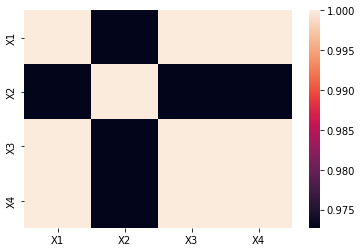

In [288]:
sns.heatmap(corr)

In [298]:

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.5:
            if columns[j]:
                columns[j] = False

In [299]:
selected_columns = data.columns[columns]
selected_columns.shape

(1,)

In [300]:
data1 = data[selected_columns]
print(data1)

    X1
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
9   10
10  11
11  12
12  13
13  14


,X1,X2,X3,X4
0,1,1,4,1
1,2,4,5,2
2,3,9,6,3
3,4,16,7,4
4,5,25,8,5
5,6,36,9,6
6,7,49,10,7
7,8,64,11,8
8,9,81,12,9
9,10,100,13,10
